<a href="https://colab.research.google.com/github/krisrjensen/phd_work_sandbox/blob/main/csc730_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 1

In [1]:
from bidict import bidict
from datetime import datetime
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn import datasets, metrics

google = False
data_path = 'G:/My Drive/csc730'

In [3]:
if google == True:
    from google.colab import drive
    drive.mount('/content/drive')
    !ls "/content/drive/"


In [ ]:
# %matplotlib qt

In [4]:
if google==True:
    X_y = np.load(f'{data_path}/skewed_MNIST.npy')
else:
    X_y = np.load(f'{data_path}/skewed_MNIST.npy')
    
X = X_y[:,:-1]
y = X_y[:,-1]
print(X.shape,y.shape)

(12244, 784) (12244,)


(array([ 191.,   23.,  383., 6131., 3065.,   95.,  766.,   11., 1579.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

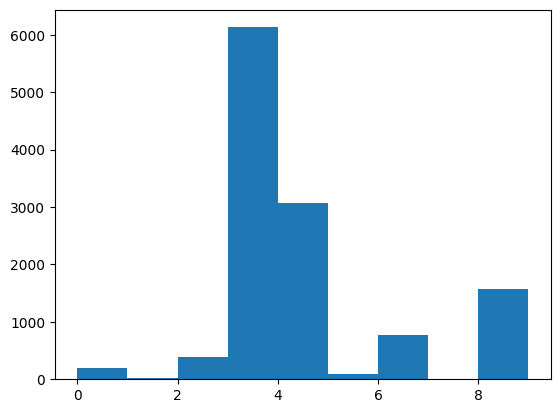

In [70]:
plt.hist(y, bins=np.linspace(0,9,10))

probability=array([0.01559948, 0.00187847, 0.03128063, 0.50073505, 0.25032669,
       0.0077589 , 0.06256125, 0.0008984 , 0.00383861, 0.12512251]) bins=array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]) counts=array([ 191,   23,  383, 6131, 3065,   95,  766,   11,   47, 1532],
      dtype=int64)


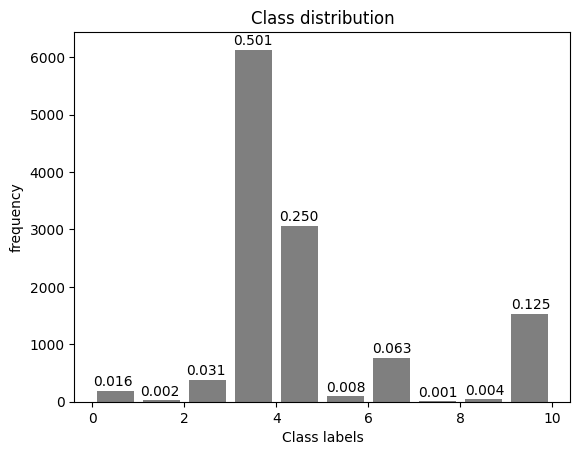

In [86]:
plt.hist(y.astype(int), bins=np.linspace(0,10,11), color='black', alpha=0.5, rwidth=0.8)
plt.xlabel('Class labels')
plt.ylabel('frequency')
plt.title('Class distribution')

probability, bins = np.histogram(y, bins=np.linspace(0,10,11), density=True)
counts, bins = np.histogram(y, bins=np.linspace(0,10,11))

print(f'{probability=} {bins=} {counts=}')

for i in range(len(probability)):
    plt.text(bins[i]+i/100+0.45, counts[i]+30, f'{probability[i]:.3f}', ha='center', va='bottom')

plt.show()


In [16]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
print(y)

[7. 7. 7. ... 3. 3. 3.]


Text(0.5, 1.0, 'Class label distribution')

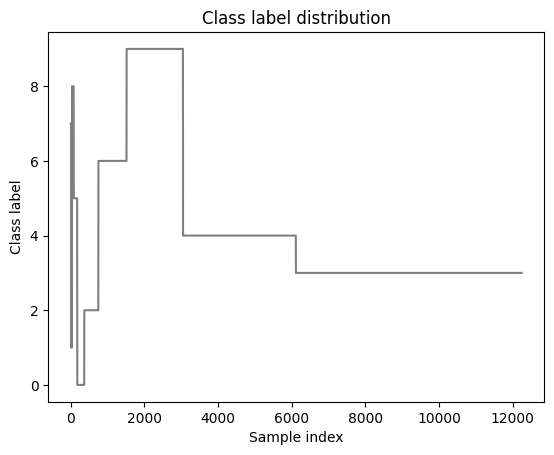

In [87]:
plt.plot(y, color='black', alpha=0.5)
plt.xlabel('Sample index')
plt.ylabel('Class label')
plt.title('Class label distribution')

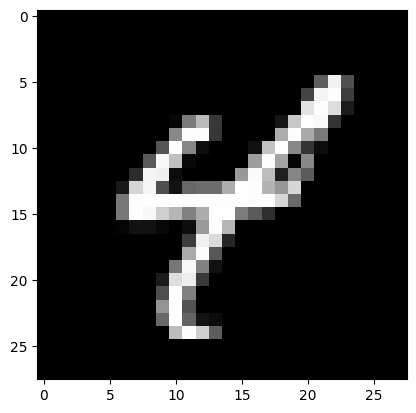

In [19]:
plt.imshow(np.reshape(X[4000],(28,28)), cmap='gray')


In [ ]:
X1 = np.pad(X, ((0, 0), (0,252)), 'constant')
print(f'shape of X1 is {X1.shape}')


shape of X1 is (12244, 1036)


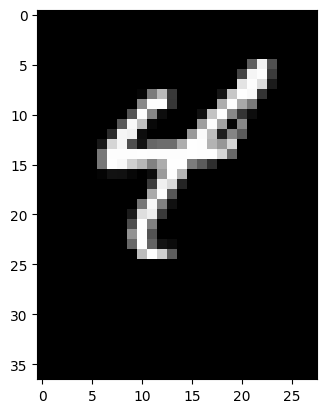

In [ ]:
plt.imshow(np.reshape(X1[4000],(37,28)), cmap='gray')

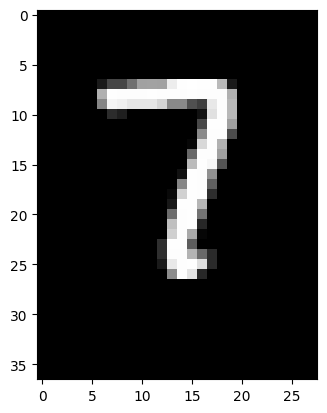

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


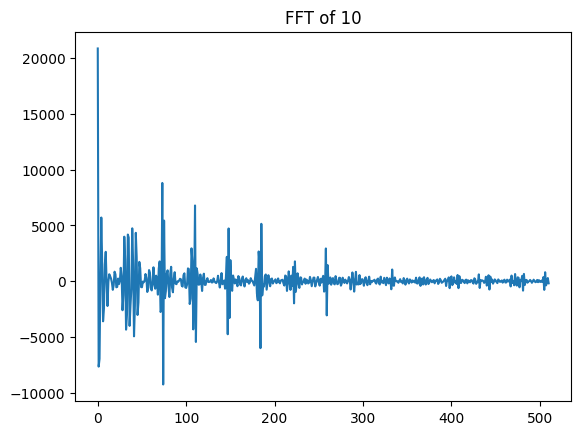

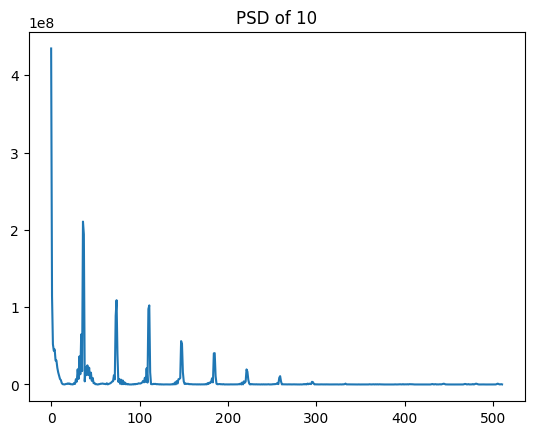

In [ ]:
experiment = 10
plt.imshow(np.reshape(X1[experiment],(37,28)), cmap='gray')
plt.show()

FFT_X1=np.fft.fft(X1[experiment][0:1023])
plt.plot(FFT_X1[0:int(len(FFT_X1)/2)])
plt.title(f'FFT of {experiment}')
plt.show()

plt.plot(np.abs(FFT_X1[0:int(len(FFT_X1)/2)])**2)
plt.title(f'PSD of {experiment}')
plt.show()

In [ ]:
#this cell will calculate the FFTs and PSD for all data points
FFT_all=np.array([np.fft.fft(X1[i][0:1024]) for i in range(X1.shape[0])])
PSD_all = np.abs(FFT_all)**2

In [ ]:
print(f'shape of FFT_all {FFT_all.shape}')
print(f'shape of PSD_all {PSD_all.shape}')

shape of FFT_all (12244, 1024)
shape of PSD_all (12244, 1024)


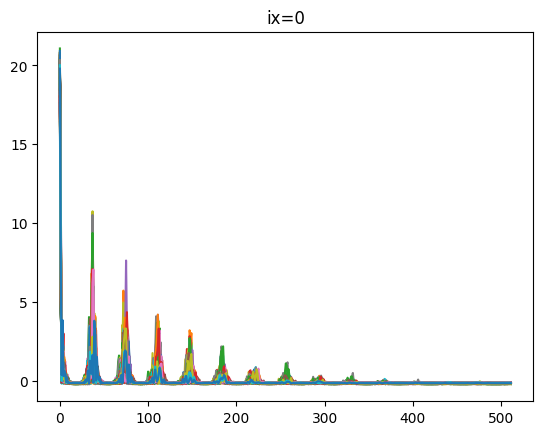

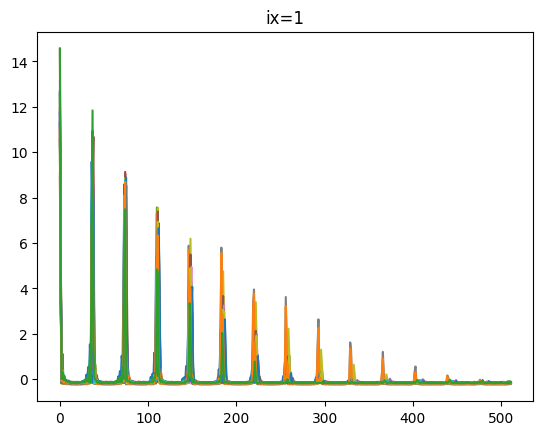

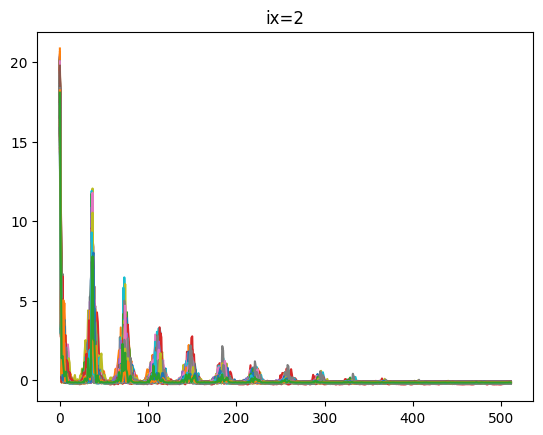

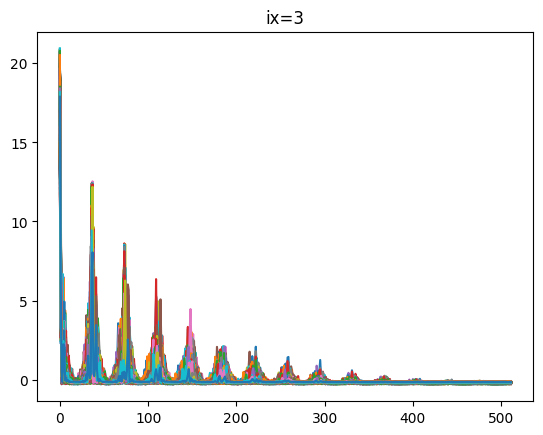

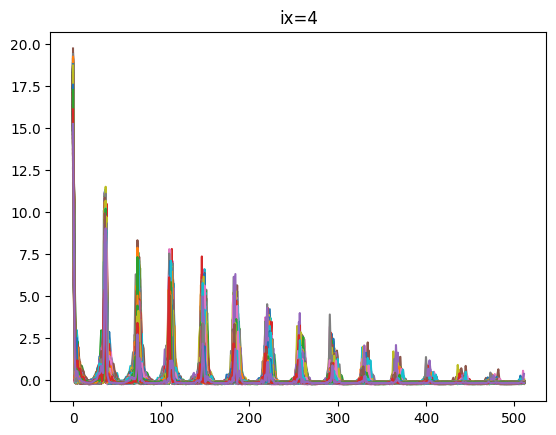

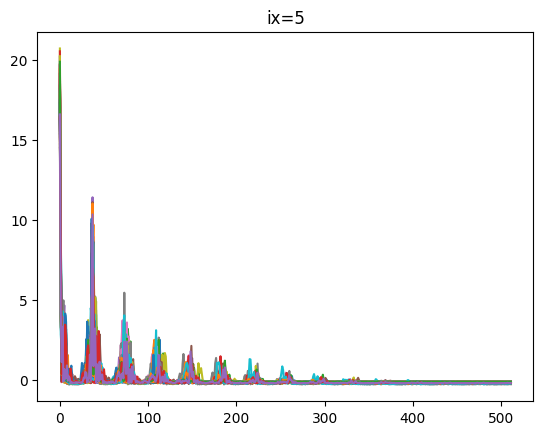

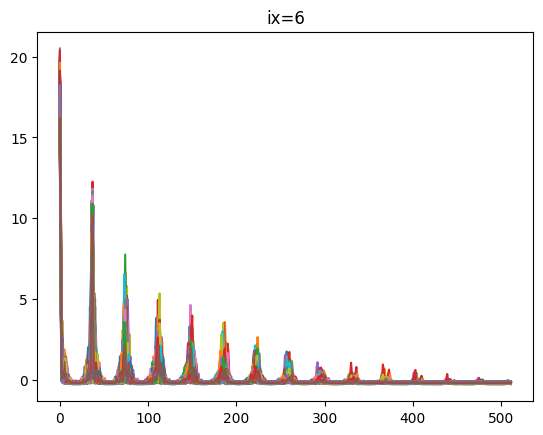

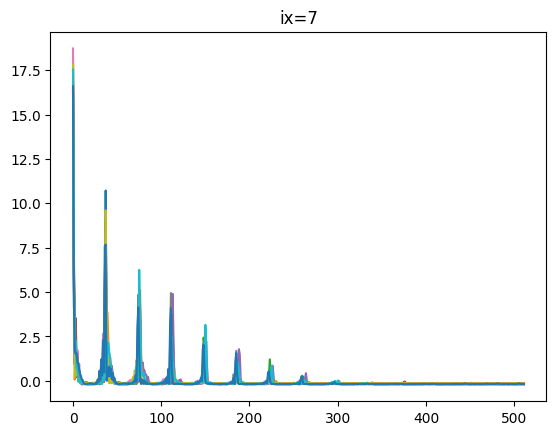

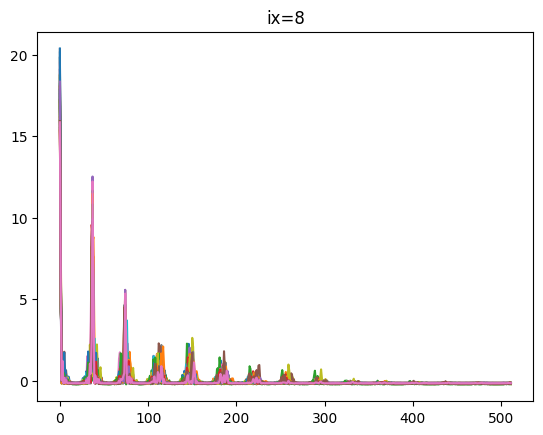

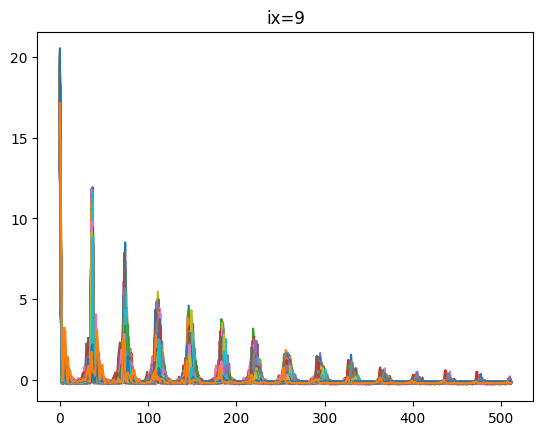

In [ ]:
#plot all PSD with corresponding label y = Y_selected
Y_selected = 4

scores = np.zeros(FFT_all.shape[0])
score_index=0





(2, 12244)


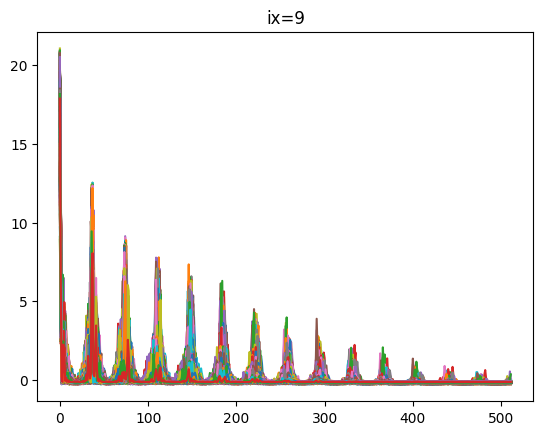

In [ ]:
scores = np.zeros([2,FFT_all.shape[0]])
print(scores.shape)
score_index=0

scores[1]=y

for i, val in enumerate(FFT_all):
  # Z-score standardization
  data = PSD_all[i][0:512]
  mean = np.mean(data)
  std_dev = np.std(data)
  data = (data - mean) / std_dev
  scores[0][score_index] = np.sum(data)
  score_index+=1
  plt.plot(data)
plt.title(f'{ix=}')
plt.show()

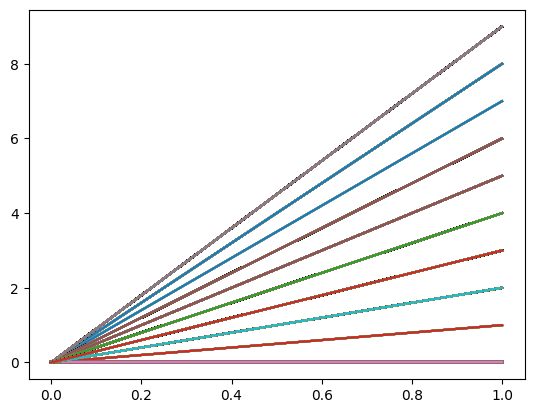

counts=array([12435,    23,   383,  6131,  3065,     0,    95,   766,    11,
          47,  1532]) bins=array([-4.97379915e-14,  8.18181818e-01,  1.63636364e+00,  2.45454545e+00,
        3.27272727e+00,  4.09090909e+00,  4.90909091e+00,  5.72727273e+00,
        6.54545455e+00,  7.36363636e+00,  8.18181818e+00,  9.00000000e+00])


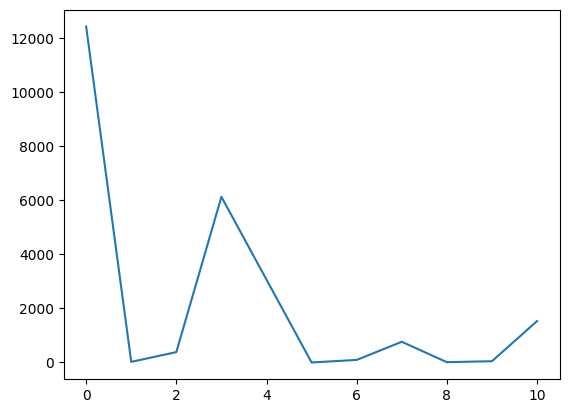

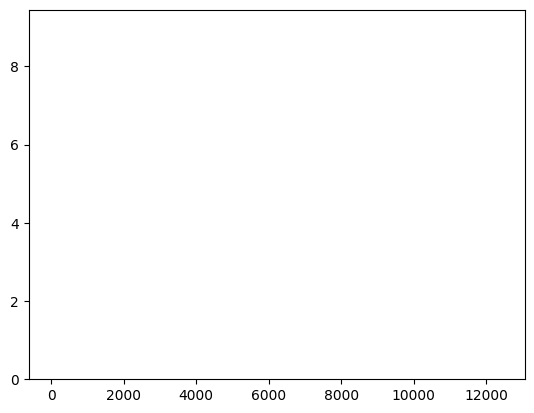

In [ ]:

plt.plot(scores)
plt.show()

counts, bins = np.histogram(scores, bins=11)
print(f'{counts=} {bins=}')
plt.plot(counts)
plt.show()

plt.bar(counts, bins[1:])
plt.show()

In [ ]:
y_counts, y_bins = np.histogram(y,bins=11)
print(f'{y_counts=} {y_bins=}')

y_counts=array([ 191,   23,  383, 6131, 3065,    0,   95,  766,   11,   47, 1532]) y_bins=array([0.        , 0.81818182, 1.63636364, 2.45454545, 3.27272727,
       4.09090909, 4.90909091, 5.72727273, 6.54545455, 7.36363636,
       8.18181818, 9.        ])


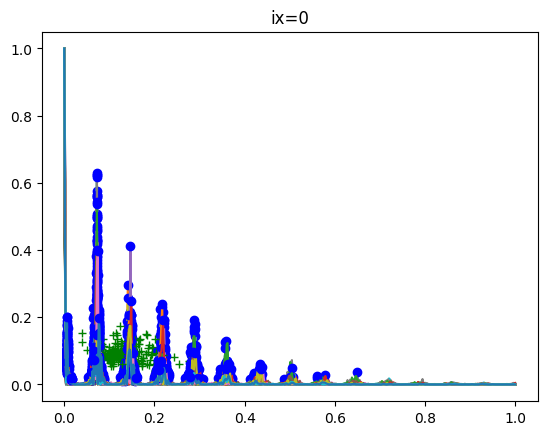

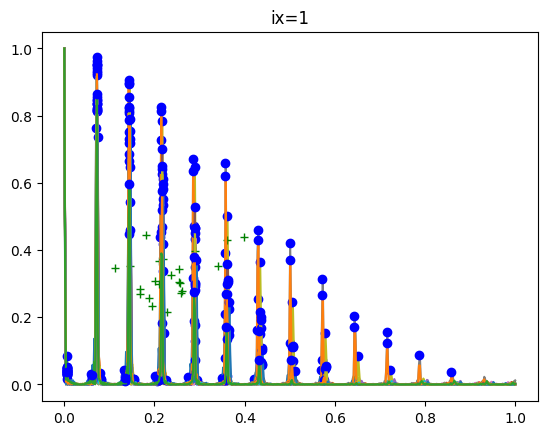

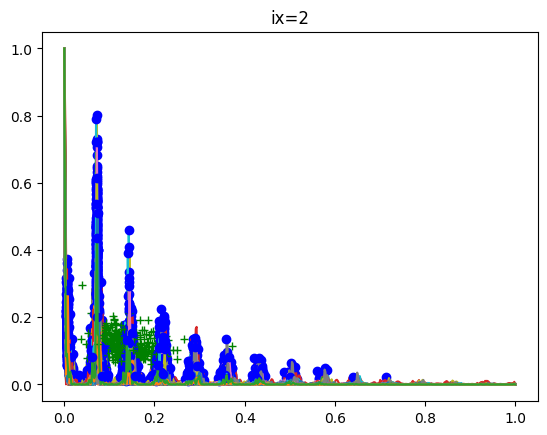

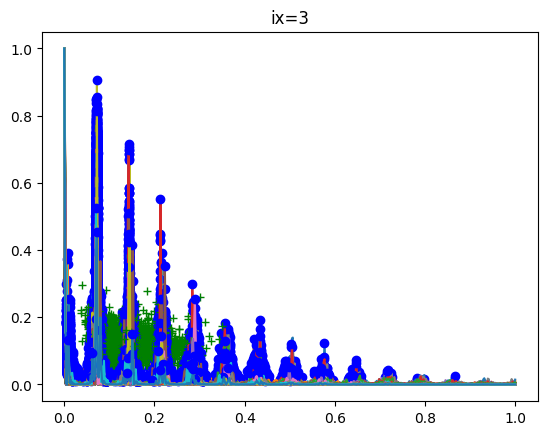

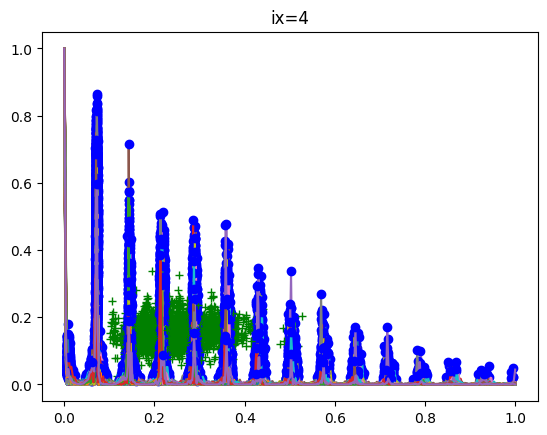

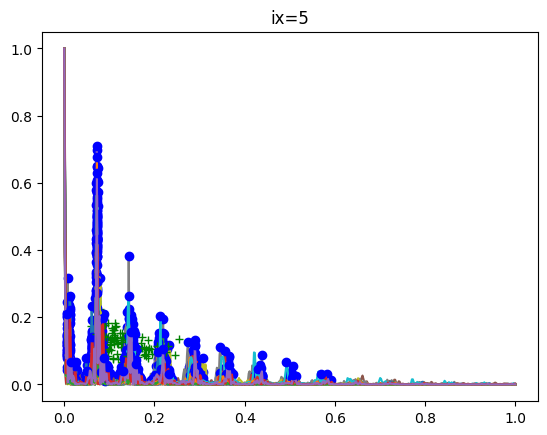

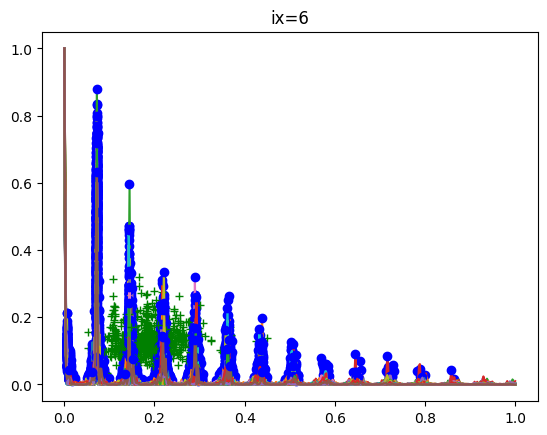

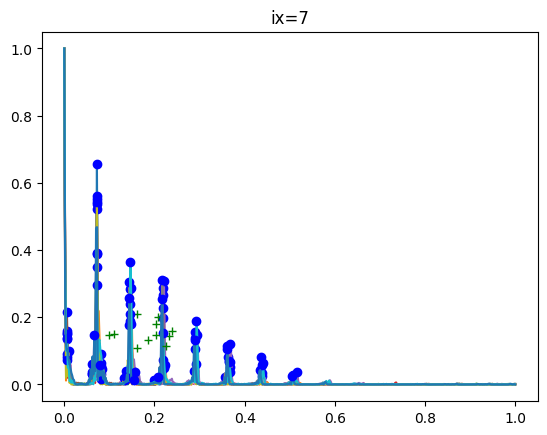

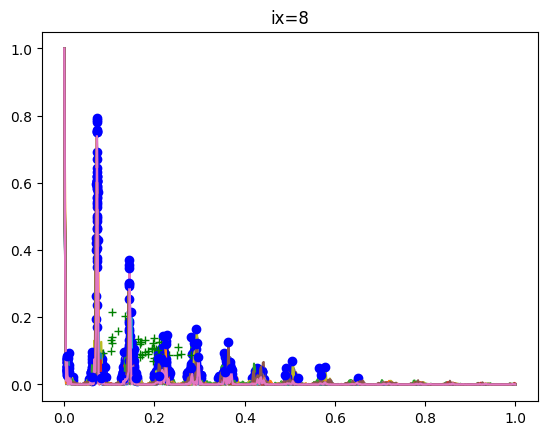

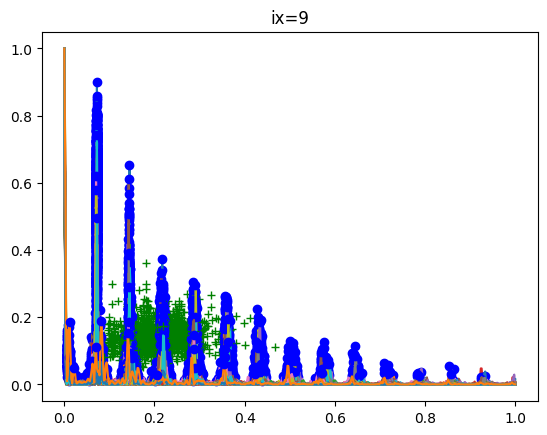

In [ ]:
from scipy.signal import find_peaks

for ix in range(0,10):
  for i, val in enumerate(y):
    if val == ix:
      # min-max standardization
      data = PSD_all[i][0:512]
      norm_k = np.linspace(0,1,512)
      max_val = np.max(data)
      min_val = np.min(data)
      data = (data - min_val) / (max_val - min_val)
      peaks = find_peaks(data, height = 0.01, threshold=0.01, distance=5)

      peak_values = np.array([data[peaks[0][i]] for i in range(peaks[0].shape[0])])
      peaks = peaks[0]/512

      anom_x = np.average(peaks)
      anom_y = np.average(peak_values)


      plt.plot(norm_k ,data)
      plt.plot(peaks, peak_values, 'bo')
      plt.plot(anom_x, anom_y, 'g+')

  plt.title(f'{ix=}')
  plt.show()

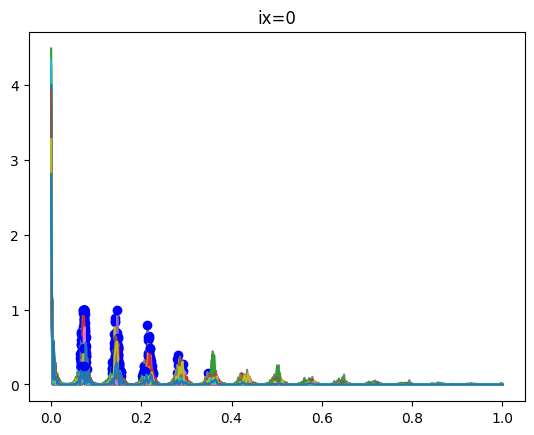

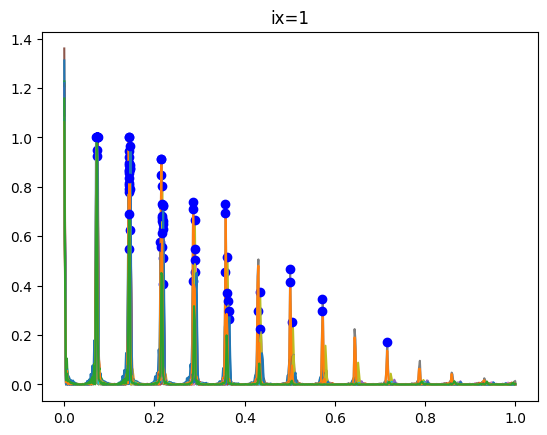

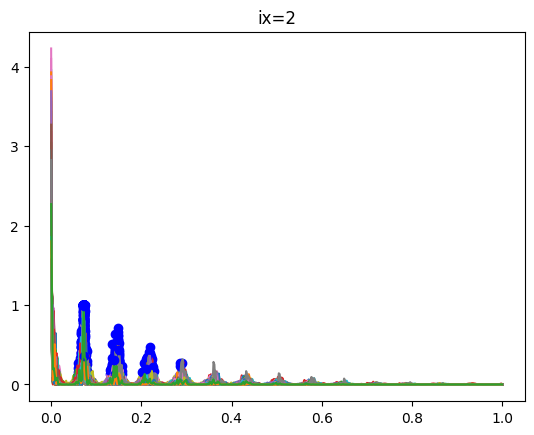

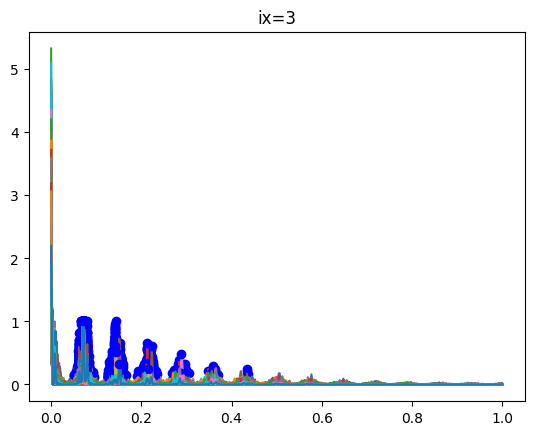

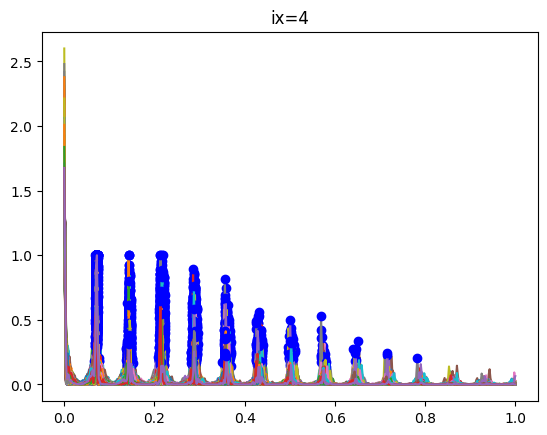

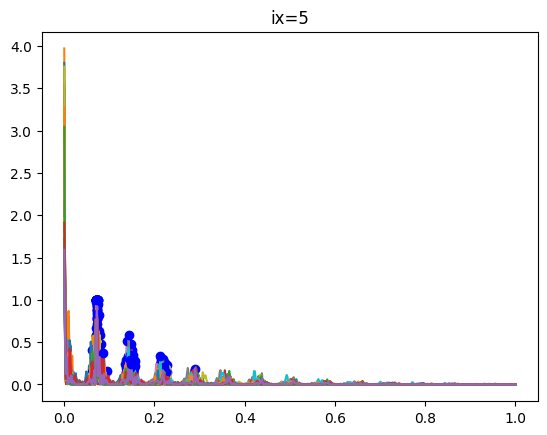

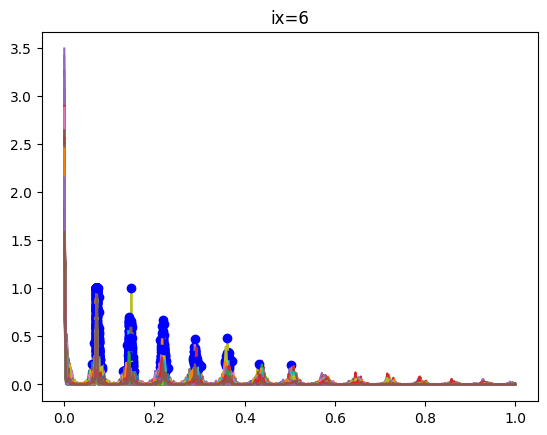

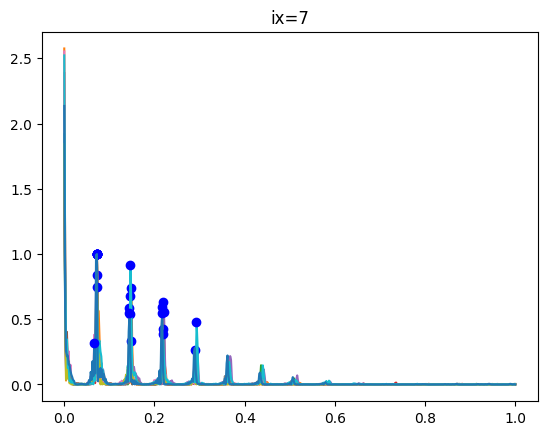

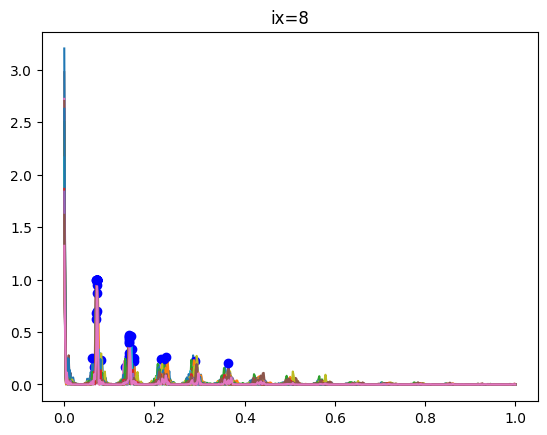

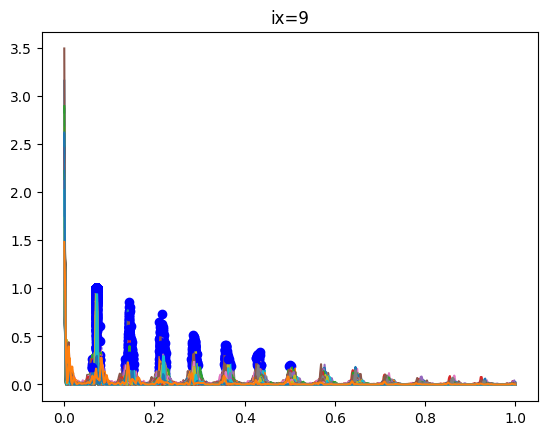

In [ ]:
from scipy.signal import find_peaks

for ix in range(0,10):
  for i, val in enumerate(y):
    if val == ix:
      # min-max standardization
      data = PSD_all[i][0:512]
      norm_k = np.linspace(0,1,512)
      max_val = np.max(data[1:])
      min_val = np.min(data[1:])
      data = (data - min_val) / (max_val - min_val)
      peaks = find_peaks(data, height = 0.1, threshold=0.1, distance=10)

      peaks = peaks[0]
      peaks = peaks[peaks>10]

      peak_values = np.array([data[peaks[i]] for i in range(peaks.shape[0])])
      peaks = peaks/512

      A = np.vstack([peaks, np.ones(len(peaks))]).T
      m, c = np.linalg.lstsq(A, peak_values, rcond=None)[0]


      plt.plot(norm_k ,data)
      plt.plot(peaks, peak_values, 'bo')
      #plt.plot(norm_k, norm_k*m , 'g')

  plt.title(f'{ix=}')
  plt.show()

In [ ]:
data.shape

(512,)

shape of X1 is (12244, 1036)
(0,)


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


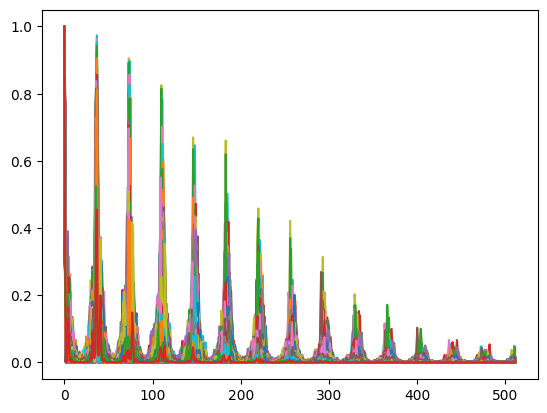

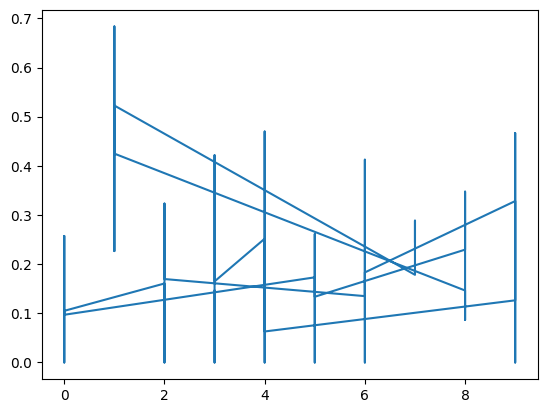

In [ ]:
# Using only X, come up with some method to assign an "anomalousness score" to each point (from scratch)
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

#pad X data to 2^n for FFT processing
X1 = np.pad(X, ((0, 0), (0,252)), 'constant')
print(f'shape of X1 is {X1.shape}')

FFT_all=np.array([np.fft.fft(X1[i][0:1024]) for i in range(X1.shape[0])])
PSD_all = np.abs(FFT_all)**2

scores = np.array([])
print(scores.shape)



for i, val in enumerate(PSD_all):
  data = PSD_all[i][0:512]
  max_val = np.max(data)
  min_val = np.min(data)
  data = (data - min_val) / (max_val - min_val)
  plt.plot(data)

  peaks=find_peaks(data, height = 0.02, threshold=0.01, distance=7)

  x_fit = peaks[0]/512
  y_fit = peaks[1]['peak_heights']
  if x_fit.shape[0]>=3:
    #print(f'{x_fit=} {y_fit=}')
    popt, pcov = curve_fit(exp_func, x_fit, y_fit, maxfev=500000, bounds=(0, [3., 1., 0.5]))

    if scores.shape[0]==0:
      scores = popt
    else:
      scores = np.vstack((scores, popt))
  else:
    scores=np.vstack((scores, np.array([[0,0,0]])))
plt.show()
plt.plot(y,scores[:,0])
plt.show()

[1.51150260e-01 1.00000000e+00 2.03001824e-15]


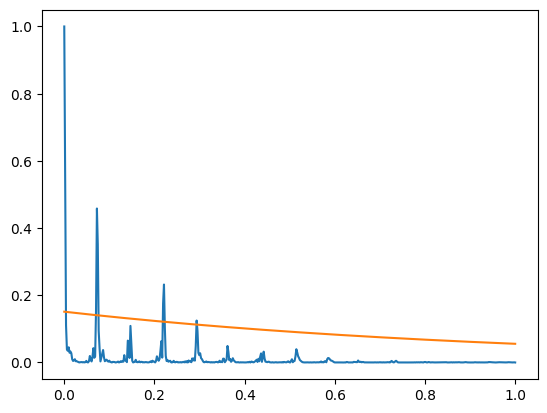

In [ ]:
x_space= np.linspace(0,1,512)
experiment=4000
data = PSD_all[experiment][0:512]
max_val = np.max(data)
min_val = np.min(data)
data = (data - min_val) / (max_val - min_val)
plt.plot( x_space,data)
plt.plot(x_space, exp_func(x_space, scores[experiment][0],scores[experiment][1],scores[experiment][2] ))
print(scores[experiment])


In [ ]:
A=np.array([4,2,5])
B=np.array([6,4,2])
np.vstack((A,B))

array([[4, 2, 5],
       [6, 4, 2]])

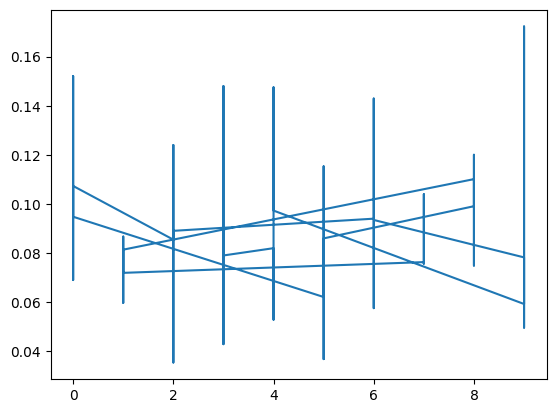

In [ ]:
plt.plot(y,scores)

In [ ]:
# Using y, calculate the probabilities of each class

y_probabilities, y_bins = np.histogram(y,bins=np.unique(y), density=True)

print(f'{y_probabilities=} {y_bins=}')


y_probabilities=array([0.01559948, 0.00187847, 0.03128063, 0.50073505, 0.25032669,
       0.0077589 , 0.06256125, 0.0008984 , 0.12896112]) y_bins=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


In [ ]:
# Assuming the "correct" answer would be to have the anomalousness ranking match the ordering of the
# class probability, calculate the accuracy of your method
H = np.array([scores, y]).T


score_probabilities=array([3.28411556e+10, 1.31364623e+11, 4.83586017e+12, 1.16750308e+13,
       1.72990787e+13, 4.90728968e+13, 1.27259478e+13, 4.53207948e+12,
       1.88836645e+11, 3.28411556e+10]) score_bins=array([-4.97379915e-14, -3.97903932e-14, -2.98427949e-14, -1.98951966e-14,
       -9.94759830e-15,  0.00000000e+00,  9.94759830e-15,  1.98951966e-14,
        2.98427949e-14,  3.97903932e-14,  4.97379915e-14])
